## Pharmaceutical Sales prediction across multiple stores 

### Using Machine Learning and Deep Learning approaches to predict Pharmaceutical store(s) sales depending on factors such as promotions, competition, school and state holidays, seasonality, and locality as necessary for predicting the sales across the various stores

## Part 01. Exploration of customer purchasing behavior

## 1.1 Promotion Distribution of data in both training and test sets.

- Importing Neccessary packages and Lading data

In [3]:
# Importing Neccessary packages
import sys, os
import json
import requests
import time
import datetime as dt
from datetime import date, timedelta, datetime

from itertools import repeat
import itertools

import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as ss
from random import randint

import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics

### Loading the given Datasets

In [11]:
# Class to load the data
class FetchData():
    def __init__(self):
        self.dfdict = {}
        self.dfdict['train'] = self.get_train_data()
        self.dfdict['test'] = self.get_test_data()
        self.dfdict['sample'] = self.get_sample_data()
        self.dfdict['store'] = self.get_store_data()
        
    def get_train_data(self,name='train'):
        filename = f'../data/{name}.csv'        
        return pd.read_csv(filename)
    
    def get_test_data(self,name='test'):
        filename = f'../data/{name}.csv'        
        return pd.read_csv(filename)
        
    def get_store_data(self,name='store'):
        filename = f'../data/{name}.csv'        
        return pd.read_csv(filename)  
    
    def get_sample_data(self,name='sample_submission'):
        filename = f'../data/{name}.csv'        
        return pd.read_csv(filename)  
        
    def df_train_store(self,name='train', name1 = 'store'):
        '''
        Join train and Store data.
            
        '''
        
        
        return df



In [14]:
data = FetchData()
train_data = data.get_train_data("train")
store_data = data.get_train_data("store")
test_data = data.get_train_data("test")
sample_submission_data = data.get_train_data("sample_submission")
print("Train Data")
print(train_data.info())
print("Store Data")
print(store_data.info())
print("Test Data")
print(test_data.info())
print("Sample Submission")
print(sample_submission_data.info())

/home/ethan/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ethan/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Train Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
Store Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non

In [13]:
tsdf = data.df_to_prophet(name='train',prefilter={'Store':1})
print(tsdf.shape)
tsdf.head()

TypeError: df_to_prophet() got an unexpected keyword argument 'prefilter'

(<Figure size 1440x720 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

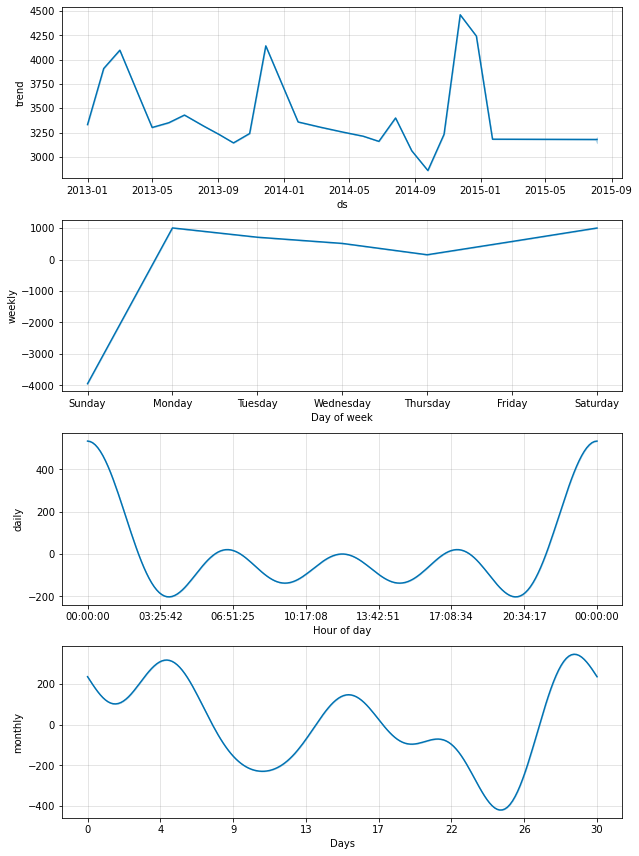

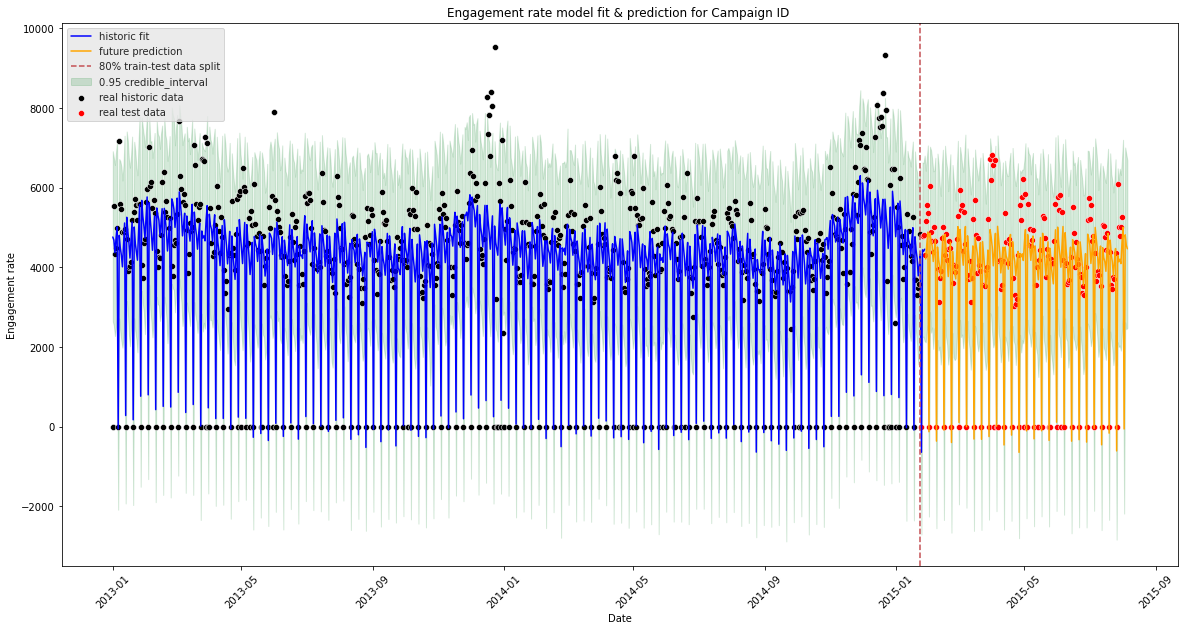

In [9]:
plot_prophet(tsdf, changepoint_prior_scale = 10,  periods = 5) 
#              seasonality_prior_scale = 0.05